# Multiclass classification - weather outlook

In [76]:
from warnings import filterwarnings; filterwarnings("ignore")

# Step 1 - Data Ingestion

In [77]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv


In [78]:
import pandas as pd
df = pd.read_csv(url)
df.head()
df = pd.read_csv('train_weather.csv')
df.head(2)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy


# Target Feature - Weather Type

# Step 2 - Perfom basic data quality checks

In [79]:
df.shape

(13200, 11)

In [80]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [81]:
df.duplicated().sum()

np.int64(0)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


# Step 3 - Seperate X and Y

In [83]:
X = df.drop(columns = ["Weather Type"])
Y = df["Weather Type"]

In [84]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [85]:
Y.head()

0     Rainy
1    Cloudy
2     Sunny
3     Sunny
4     Rainy
Name: Weather Type, dtype: object

In [86]:
Y.value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

# Step 4 - Apply Train test split

In [87]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size=0.2, random_state=42)

In [88]:
xtrain.head(3)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
3958,32.0,66,6.0,92.0,partly cloudy,1010.21,2,Spring,1.5,inland
2239,15.0,96,11.0,57.0,overcast,1016.98,0,Autumn,4.0,mountain
3608,28.0,58,6.5,11.0,clear,1025.37,10,Summer,9.0,inland


In [89]:
ytrain.head(3)

3958    Rainy
2239    Rainy
3608    Sunny
Name: Weather Type, dtype: object

In [90]:
xtest.head(3)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
4111,23.0,38,4.5,6.0,clear,1021.19,9,Autumn,10.0,inland
10607,62.0,94,14.5,83.0,clear,1025.57,10,Summer,4.0,inland
7372,40.0,51,2.0,12.0,partly cloudy,1025.15,8,Spring,8.0,mountain


In [91]:
ytest.head()

4111     Sunny
10607    Sunny
7372     Sunny
11786    Snowy
12227    Sunny
Name: Weather Type, dtype: object

In [92]:
xtrain.shape

(10560, 10)

In [93]:
xtest.shape

(2640, 10)

# Step 5 - Apply preprocessing on X, Y

In [94]:
X.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
dtype: object

In [95]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_cols

['Cloud Cover', 'Season', 'Location']

In [96]:
num_cols = X.select_dtypes(include="number").columns.tolist()
num_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

In [97]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [98]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
)

In [99]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [100]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
).set_output(transform="pandas")

In [101]:
pre.fit(xtrain)

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [102]:
xtrain_pre = pre.transform(xtrain)
xtrain_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
3958,0.727984,-0.129706,-0.553679,1.204747,0.123123,-0.523097,-1.179544,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2239,-0.248339,1.352488,0.170676,0.109053,0.304828,-1.041944,-0.436072,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.498261,-0.524958,-0.481244,-1.331000,0.530012,1.552291,1.050873,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6848,1.589447,0.759610,5.023858,0.985608,-0.358649,-0.523097,-1.030850,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6119,-0.076047,-0.129706,0.605290,-1.362306,-0.149837,-0.782520,0.753484,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [103]:
xtest_pre = pre.transform(xtest)
xtest_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
4111,0.211107,-1.513087,-0.770986,-1.487528,0.417823,1.292867,1.348262,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10607,2.450909,1.253675,0.677725,0.922997,0.535380,1.552291,-0.436072,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7372,1.187431,-0.870803,-1.133164,-1.299695,0.524108,1.033444,0.753484,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
11786,-1.511817,0.512578,-0.481244,1.142136,-0.323758,-1.041944,-1.179544,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
12227,0.096246,1.253675,0.025805,1.736940,0.592817,1.811714,1.050873,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


# Y - OneHotEncoding

In [104]:
ytrain_pre = pd.get_dummies(ytrain, dtype=int)
ytrain_pre.head()

,Cloudy,Rainy,Snowy,Sunny
3958,0,1,0,0
2239,0,1,0,0
3608,0,0,0,1
6848,0,1,0,0
6119,1,0,0,0


In [105]:
ytest_pre = pd.get_dummies(ytest, dtype=int)
ytest_pre.head()

,Cloudy,Rainy,Snowy,Sunny
4111,0,0,0,1
10607,0,0,0,1
7372,0,0,0,1
11786,0,0,1,0
12227,0,0,0,1


# Step 6 - Build neural network
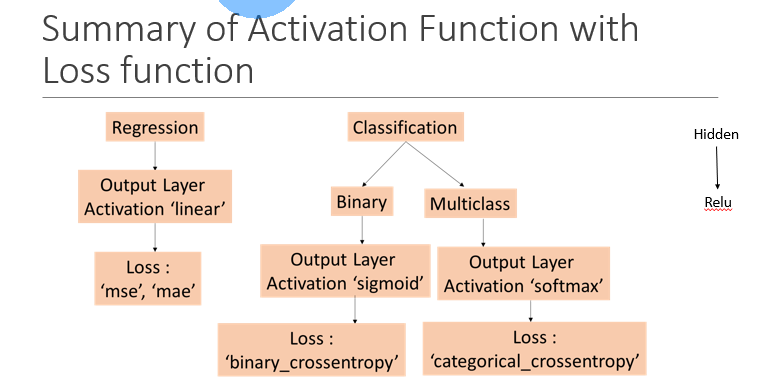

In [106]:
xtrain_pre.shape[1]

15

In [107]:
ytrain_pre.shape[1]

4

# L2 - Ridge penalty is applied on square of coefficients

In [108]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [109]:
model = Sequential(
    layers = [
        Input(shape=(xtrain_pre.shape[1],)),
        Dense(32, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(16, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(ytrain_pre.shape[1], activation="softmax")
    ]
)

In [110]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,108 (4.33 KB)

 Trainable params: 1,108 (4.33 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [112]:
es = EarlyStopping(patience=10, restore_best_weights=True)

In [113]:
hist = model.fit(xtrain_pre, ytrain_pre, validation_split=0.2, epochs=100, callbacks=[es], verbose=False)

# Plot the lerarning curve

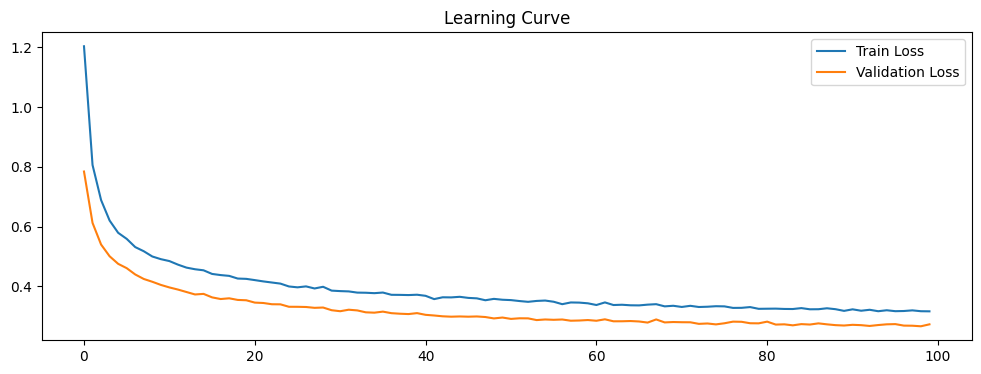

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Step 7 - Model evaluation

In [115]:
train_loss, train_acc = model.evaluate(xtrain_pre, ytrain_pre, verbose=False)
print(f"Train Loss : {train_loss:.4f}")
print(f"Train accuracy : {train_acc:.2%}")

Train Loss : 0.2662
Train accuracy : 91.32%


In [116]:
test_loss, test_acc = model.evaluate(xtest_pre, ytest_pre, verbose=False)
print(f"Test loss : {test_loss:.4f}")
print(f"Test accuracy : {test_acc:.2%}")

Test loss : 0.2875
Test accuracy : 90.27%


In [117]:
classes = ytrain_pre.columns.tolist()
classes

['Cloudy', 'Rainy', 'Snowy', 'Sunny']

In [118]:
yprob_train = model.predict(xtrain_pre, verbose=False)
yprob_train[0:5]

array([[3.0489555e-02, 9.4586480e-01, 7.9128454e-03, 1.5732812e-02],
       [2.2578135e-02, 9.7236019e-01, 3.2542257e-03, 1.8074705e-03],
       [1.1989878e-03, 1.5990318e-04, 3.9062509e-04, 9.9825042e-01],
       [1.3971947e-02, 9.8212445e-01, 1.9065624e-03, 1.9970182e-03],
       [9.9796081e-01, 4.2529713e-04, 4.2795678e-04, 1.1860218e-03]],
      dtype=float32)

In [119]:
train_idx = yprob_train.argmax(axis=1)
train_idx

array([1, 1, 3, ..., 0, 0, 1], shape=(10560,))

In [120]:
ypred_train = [classes[idx] for idx in train_idx]
ypred_train[0:5]

['Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy']

In [121]:
def predict_weather(model, x):
  yprob = model.predict(x, verbose=False)
  index = yprob.argmax(axis=1)
  ypred = [classes[i] for i in index]
  return ypred

In [122]:
yprob_test = model.predict(xtest_pre, verbose=False)
yprob_test[0:5]

array([[8.3533768e-04, 1.2277527e-04, 3.3557325e-04, 9.9870634e-01],
       [5.4315622e-03, 1.4740896e-03, 1.7281135e-03, 9.9136621e-01],
       [5.4238625e-03, 7.2906364e-04, 1.4984751e-03, 9.9234855e-01],
       [3.8786661e-06, 3.5206111e-05, 9.9994731e-01, 1.3542522e-05],
       [1.9792561e-01, 3.6913276e-02, 3.2449253e-02, 7.3271179e-01]],
      dtype=float32)

In [123]:
ytest_pred = predict_weather(model, xtest_pre)
ytest_pred[0:5]

['Sunny', 'Sunny', 'Sunny', 'Snowy', 'Sunny']

In [124]:
ytest.head()

4111     Sunny
10607    Sunny
7372     Sunny
11786    Snowy
12227    Sunny
Name: Weather Type, dtype: object

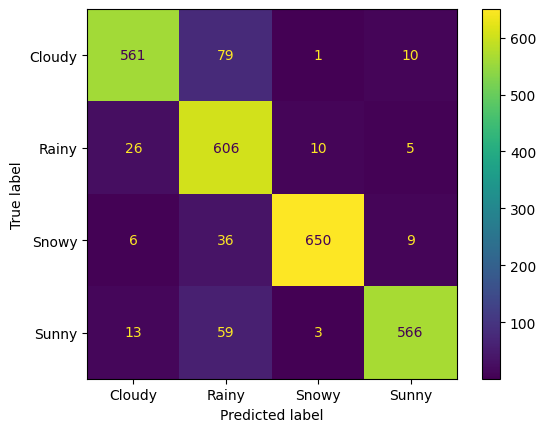

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ytest_pred)

In [126]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

      Cloudy       0.93      0.86      0.89       651
       Rainy       0.78      0.94      0.85       647
       Snowy       0.98      0.93      0.95       701
       Sunny       0.96      0.88      0.92       641

    accuracy                           0.90      2640
   macro avg       0.91      0.90      0.90      2640
weighted avg       0.91      0.90      0.90      2640



# Above results show that this is a good model and can be used for out of sample prediction

# Step 8 - Out of sample prediction

In [127]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv


In [141]:
xnew = pd.read_csv(url2)
xnew.head()
xnew = pd.read_csv('test_weather.csv')
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland


In [142]:
xnew.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       1
Cloud Cover             1
Atmospheric Pressure    0
UV Index                0
Season                  2
Visibility (km)         1
Location                2
dtype: int64

In [143]:
pre

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [145]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
0,-1.109801,-0.030893,0.895032,0.390803,-0.555116,-1.041944,-1.030850,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5.035295,1.895959,0.750161,0.922997,0.251685,1.811714,0.456095,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.018616,0.364359,0.387983,-0.579668,0.312343,-0.004250,0.753484,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.153676,1.500707,1.257209,0.140359,0.189954,-1.041944,-0.584766,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.785415,-2.155371,-0.263937,-1.487528,0.487069,0.514597,-0.138683,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [146]:
probs = model.predict(xnew_pre, verbose=False)
probs[0:5]

array([[3.55590273e-05, 3.06964095e-04, 9.99559104e-01, 9.84413273e-05],
       [3.85587960e-02, 1.25292335e-02, 4.23696404e-03, 9.44674969e-01],
       [9.71064210e-01, 1.21704610e-02, 2.18278775e-03, 1.45825995e-02],
       [2.33363211e-02, 9.68245864e-01, 4.62025544e-03, 3.79760726e-03],
       [6.02052966e-03, 4.21137782e-04, 1.19826011e-03, 9.92360055e-01]],
      dtype=float32)

In [147]:
preds = predict_weather(model, xnew_pre)
preds[0:5]

['Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny']

In [148]:
xnew["Weather_pred"] = preds
xnew[classes] = probs.round(4)

In [149]:
xnew

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather_pred,Cloudy,Rainy,Snowy,Sunny
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy,0.0000,0.0003,0.9996,0.0001
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny,0.0386,0.0125,0.0042,0.9447
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy,0.9711,0.0122,0.0022,0.0146
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy,0.0233,0.9682,0.0046,0.0038
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny,0.0060,0.0004,0.0012,0.9924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27,59,9.5,41.0,overcast,1001.39,4,Spring,8.0,mountain,Cloudy,0.9552,0.0283,0.0039,0.0125
96,73,82,47.0,107.0,overcast,1002.73,0,Winter,0.5,mountain,Rainy,0.0056,0.9923,0.0006,0.0014
97,2,60,3.0,70.0,overcast,994.19,0,Winter,2.0,mountain,Snowy,0.0001,0.0008,0.9988,0.0003
98,33,44,1.5,11.0,clear,1011.95,7,Summer,8.5,inland,Sunny,0.0007,0.0001,0.0002,0.9991


In [150]:
xnew.to_csv("weather_res.csv")

# Step 9 - Save preprocessor and model

In [137]:
import joblib
joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [138]:
model.save("weather_model.keras")

# Load the model object

In [139]:
p = joblib.load("pre.joblib")
p

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [140]:
from keras.models import load_model

m = load_model("weather_model.keras")
m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,326 (13.00 KB)

 Trainable params: 1,108 (4.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,218 (8.67 KB)

# Sentiment analysis starting at 5:45